In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from sklearn.model_selection import train_test_split

E:\2\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


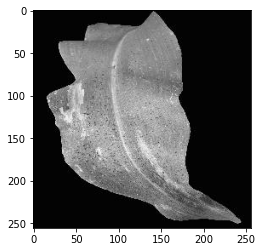

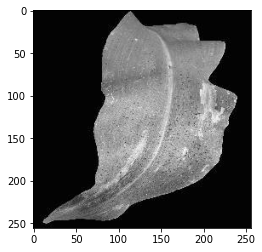

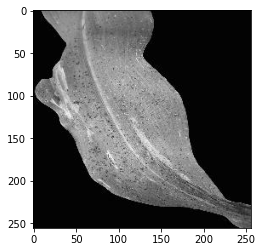

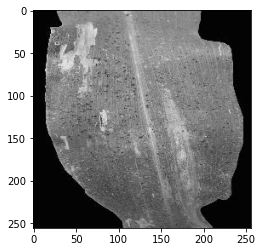

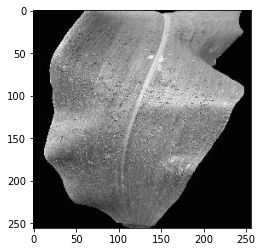

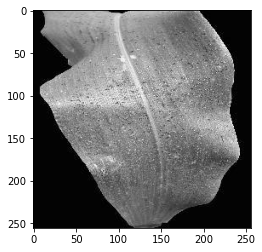

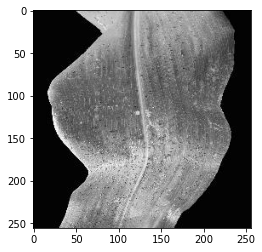

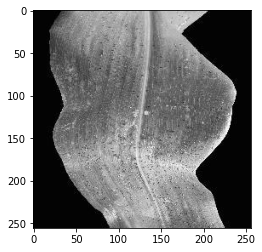

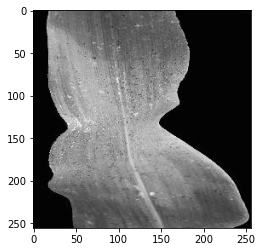

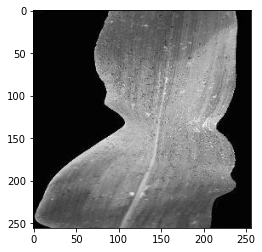

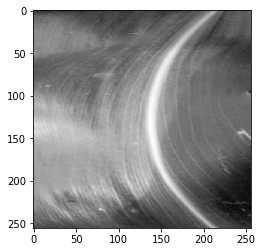

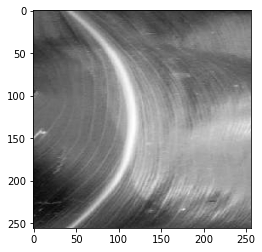

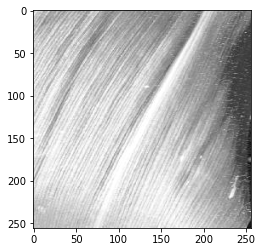

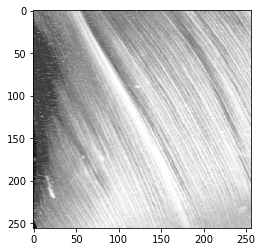

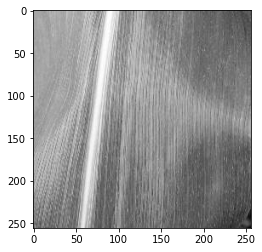

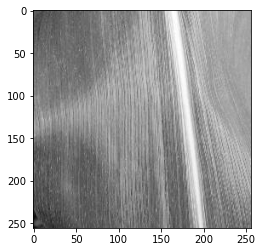

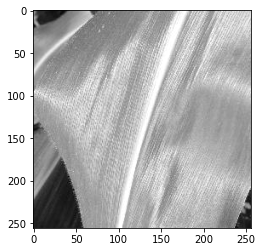

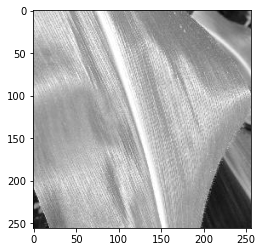

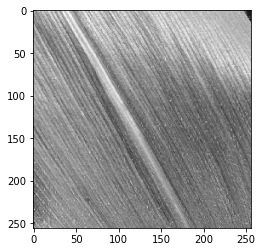

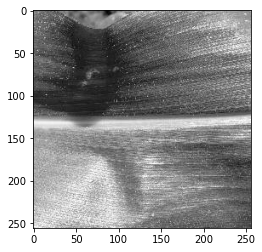

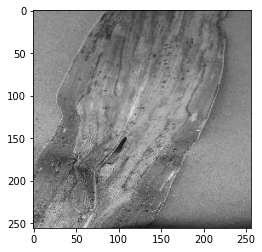

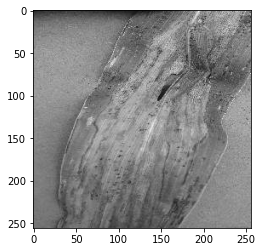

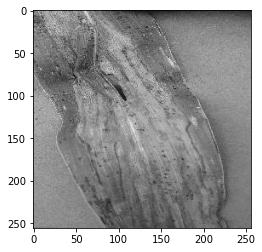

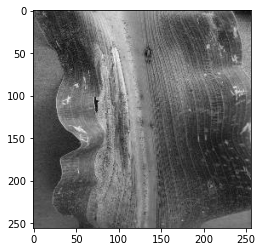

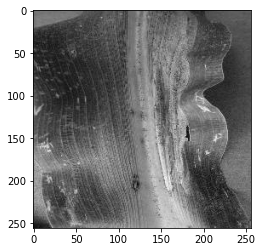

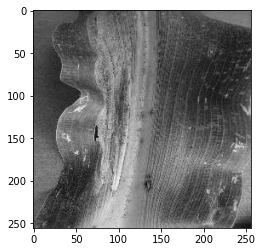

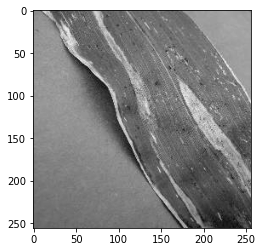

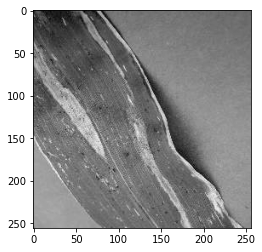

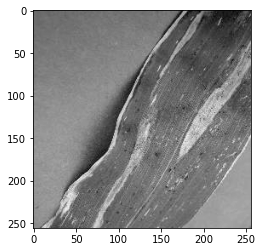

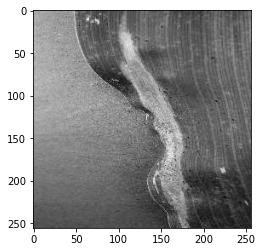

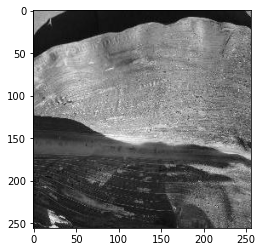

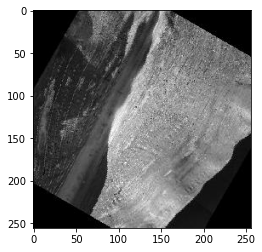

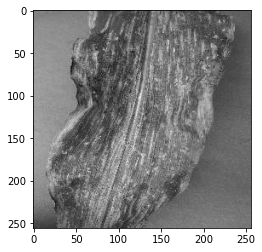

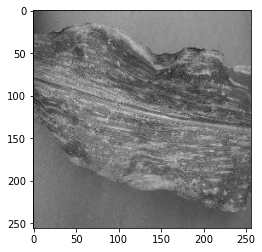

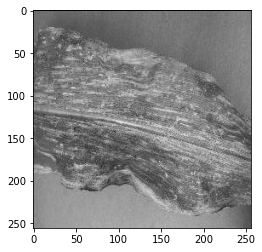

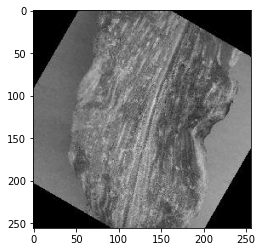

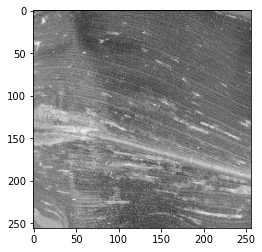

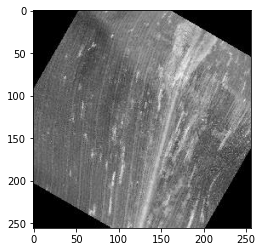

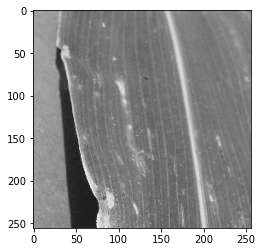

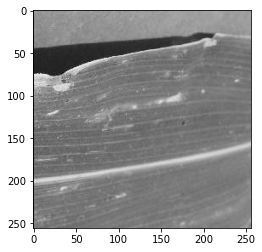

In [2]:
DATADIR = 'Corn'
CATEGORIES = ["Corn_(maize)___Common_rust_","Corn_(maize)___healthy","Corn_(maize)___Northern_Leaf_Blight","Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot"]
#الصدأ الشائع للذره & الذره الصحي & آفه أوراق الذره الشماليه & بقعه أوراق الذره المخرشيه بقعه الأوراق 
for category in CATEGORIES:# do  and 
    path = os.path.join(DATADIR,category)  # create path to Corn_Healthy and Common_Corn and Northern_Corn
    x=0
    for img in os.listdir(path):
        # iterate over each image per Corn_Healthy and Common_Corn and Northern_Corn
        x+=1
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        if x==10 : 
            
            break   

In [3]:
print(img_array)
print(img_array.shape)

[[  0 145 150 ... 153 155 156]
 [  1 150 155 ... 154 157 158]
 [  4 152 156 ... 155 159 161]
 ...
 [  0 119 113 ... 137 134 137]
 [  7 135 127 ... 136 135 141]
 [  0 127 125 ... 137 136 144]]
(256, 256)


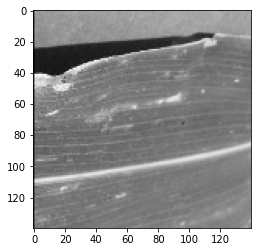

In [4]:
IMG_SIZE = 140

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

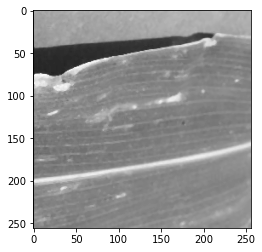

In [5]:
img_median=cv2.medianBlur(img_array,3)
plt.imshow(img_median,cmap='gray')
plt.show()

In [6]:
X = []
y = []

training_data = []

def create_training_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)   

        for img in tqdm(os.listdir(path)):   
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                img_median=cv2.medianBlur(img_array,3)
                X.append(new_array)
                y.append(class_num)  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
           

create_training_data()

print(len(training_data))

100%|█████████████████████████████████████████████████████████████████████████████| 1642/1642 [00:09<00:00, 164.92it/s]

0


In [7]:
import random
random.shuffle(training_data)
for sample in training_data[:20]:
    print(sample[1])

In [8]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y, dtype=np.int32)
X = X.astype('float32')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75)


In [9]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
from keras.utils import to_categorical


y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y = to_categorical(y, num_classes=10)

In [15]:
model.fit(X, y, epochs=6)

Epoch 1/6
229/229 [==============================] - 118s 515ms/step - loss: 0.2240 - accuracy: 0.9286
Epoch 2/6
229/229 [==============================] - 117s 512ms/step - loss: 0.1205 - accuracy: 0.9638
Epoch 3/6
229/229 [==============================] - 118s 515ms/step - loss: 0.0870 - accuracy: 0.9764
Epoch 4/6
229/229 [==============================] - 118s 514ms/step - loss: 0.0523 - accuracy: 0.9836
Epoch 5/6
229/229 [==============================] - 118s 514ms/step - loss: 0.0637 - accuracy: 0.9866
Epoch 6/6
229/229 [==============================] - 115s 503ms/step - loss: 0.1741 - accuracy: 0.9598


In [16]:
accuracy = model.evaluate(X_test, y_test)[1]
print("Accuracy:", accuracy)

58/58 [==============================] - 6s 104ms/step - loss: 0.0427 - accuracy: 0.9907
Accuracy: 0.9907053112983704


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 138, 138, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 69, 69, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 67, 67, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 33, 33, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 69696)             0         
                                                                 
 dense (Dense)               (None, 128)               8